# Resolution of a dynamical system or order 2

Let's consider the following one-degree-of-freedom system: a vertical articulated rigid bar of length $L$ with a concentrated mass $M$ at its end (we will neglect the lineic mass of the rigid bars). The first bar of the system is fixed on an infinitely rigid and massive base.

The articulated rigid bar is allowed to rotate at point $B$ thanks to a viscoelastic hinge characterized by a rotating stiffness $k$ and a viscous rotational damping $c$. The motion of the rigid structure is parameterized by the angle $\theta\left(t\right)$ between the two bars. Such a system could be a very simplified model of a post fixed on a ground. 


<img  src="Figures sujet/1dof_dynamic_loading_new.png" width=500/>

Using a Lagrange formalism, it is not too difficult to find the equation of motion governing the mass [1] :

\begin{equation}ML^2\ddot{\theta} + c\dot{\theta} + k\theta - MgL\sin\theta = 0.\label{eq11}\end{equation}

By introducing the dimensionless variables $\tau = \omega t$ with $\omega=\sqrt{k/ML^2}$ the natural frequency and dividing the equation by $k$, we can rewrite the aforementioned equation in the dimensionless form

$$\theta'' + \frac{1}{Q}\theta' + \theta = p.sin(\theta)$$

where $'$ denotes differentiation with respect to $\tau$, $Q = \frac{\sqrt{kML^2}}{c}$ is the quality factor and $p = MgL/k$, a crucial dimensionless loading parameter for the static problem modeling the ratio between weight and stiffness of the system.

For convenience, we can now transform this nonlinear Ordinary Differential Equation from the physical to the state space, by writing the above in the form of a dynamical system $\mathbf{x'} = \mathbf{f}(\mathbf{x},\tau)$:

$\hspace{8cm}$
$\begin{equation}\left\{\begin{array}{ll}
\theta = \theta \\
\phi = \theta'\end{array}\right.\end{equation}$
$\hspace{1cm} \Rightarrow \hspace{1cm}$
$\begin{equation}\left\{\begin{array}{ll}
\theta' = \theta' \\
\phi' = -\frac{1}{Q}\theta' - \theta + p.sin(\theta)\end{array}\right.\end{equation}$

where $\mathbf{x}(\tau) = \{\theta(\tau) \, \phi(\tau)\}^T$ is the $2$-dimensional state vector and $\mathbf{f}(\mathbf{x},\tau)$ is a nonlinear $2$-dimensional vector.

## Linear analysis

Here, we will perform a linear analysis about the trivial vertical state that is the fixed point $\mathbf{x}^{\ast}=\mathbf{0}$. Let $\mathbf{\eta}(t)$ be a small perturbation about $\mathbf{x}^{\ast}=\mathbf{0}$. We have $\mathbf{x}(t) = \mathbf{x}^{\ast} + \mathbf{\eta}(t)$. To derive a differential governing equation for $\mathbf{\eta}$, we write

$$\dot{\mathbf{\eta}}(t) = \dot{\mathbf{x}}(t) = \mathbf{f_1}(\mathbf{x}^{\ast}+\mathbf{\eta}(t))$$

A Taylor expansion at first order gives

$$\dot{\mathbf{\eta}}(t) = \mathbf{f_1}(\mathbf{x}^{\ast}) + \frac{\partial \mathbf{f_1}(\mathbf{x}^{\ast})}{\partial \mathbf{x}}\mathbf{\eta}(t)$$

Since $\mathbf{x}^{\ast}$ is a fixed point, we have $\mathbf{f_1}(\mathbf{x}^{\ast})=\mathbf{0}$ and the linear equation about $\mathbf{x}^{\ast}=\mathbf{0}$ is 

$$\dot{\mathbf{\eta}}(t) = \mathbf{J_1}\mathbf{\eta}(t)$$

where $\mathbf{J_1}(\mathbf{x}_0, p, Q)$ is the Jacobi matrix of the nonlinear vector functional $\mathbf{f_1}(\mathbf{x},\tau)$ evaluated at the trivial fixed points $\mathbf{x}_0 = \mathbf{0}$. Here 

$$\mathbf{J_1} = \frac{\partial \mathbf{f_1}}{\partial \mathbf{x}}\bigg|_{\mathbf{0}} = \left[\begin{array}{cc}
\frac{\partial f_1}{\partial \theta} & \frac{\partial f_1}{\partial \phi} \\
\frac{\partial f_2}{\partial \theta} & \frac{\partial f_2}{\partial \phi} \end{array}\right] = \left[\begin{array}{cc}
0 & 1 \\
-1 + p.cos(\theta_0) & -\frac{1}{Q} \end{array}\right]$$

In [1]:
import numpy as np
import cmath as cm

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.integrate import odeint
import scipy.linalg
from numpy import linalg as LA
from numpy.linalg import inv

%matplotlib inline

What we can do is to solve the dynamical system numerically and represent it as a function of time $\tau$ for the initial conditions $(\theta(0),\dot{\theta}(0))=(10,10)$ degrees, $Q=10$ and $p=0.75$. The linear equation has the advantage to be analytically solvable. It is a linear combination of its analytical eigenmodes and we plot it also:

<img  src="Figures sujet/Trajectory.png" width=500/>

#### data

In [2]:
def Data():
    
    """ Function returning data 
    at any moment user need them.
    """
    
    Q = 10
    p =   .75
    g =  9.81
    
    #IC
    theta_0   = 10 #[rad]
    d_theta_0 = 10 #[rad.s-1]

    x = np.array([theta_0, d_theta_0])
    
    a, b, c = 1, 1/Q, 1-p
    
    return Q, p, g, x, a, b, c
    
# -----

Q, p, g, x, a, b, c = Data()

def Jacobian_matrix(x_0, p, Q):
    
    """ Function returning the Jacobian matrix
    describing transformation from x to x' ; 
    given x and (p, Q) parameters.
    
    Note : x must be provided as a column vector.
    """
    
    theta_0   = x_0[0]
    d_theta_0 = x_0[1]
    
    return np.array([[0                     ,  1  ],
                     [-1 + p*np.cos(theta_0), -1/Q]])

result = Jacobian_matrix(x, p, Q)
result

array([[ 0.        ,  1.        ],
       [-1.62930365, -0.1       ]])

#### Analytical

In [3]:
def Delta(a, b, c):
    
    """ Function returning Delta value.
    """
    
    return b**2 - 4*a*c

def sol_analytic(x_0, t):
    
    """ Function returning analytical solution
    over time provided x_0 and t.
    """
    
    theta_0   = x_0[0]
    d_theta_0 = x_0[1]
    
    Xi = np.sqrt(-Delta(a, b, c)) / (2*a)
    
    A = theta_0
    B = (d_theta_0 + b/(2*a) * theta_0) / Xi
    
    theta   = np.exp(-b/(2*a) * t) * (A * np.cos(Xi*t) + B * np.sin(Xi*t))
    d_theta = (-b/(2*a)) * theta + np.exp(-b/(2*a) * t) * Xi * (-A * np.sin(Xi*t) + B * np.cos(Xi*t))
    
    return theta, d_theta

#### Numerical

In [6]:
def sol_numeric(x_0, t):
    
    """ Function returning the 
    derivative of vector f(x,t). 
    """
    
    theta, ddt_theta = x_0
    ddt_y = [ddt_theta, -1/Q * ddt_theta + (-1 + p*np.cos(0)) * theta] #cos(0) as linearization

    return ddt_y

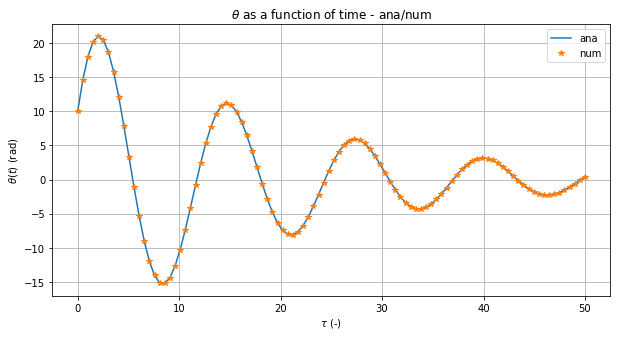

In [7]:
t = np.linspace(0, 50, 100)

u_num  = odeint(sol_numeric, x, t)
u_ana, d_u_ana = sol_analytic(x, t)

plt.figure(figsize=(10,5))

plt.plot(t, u_ana, '-', label='ana')
plt.plot(t, u_num[:,0], '*', label='num')

plt.title(r'$\theta$ as a function of time - ana/num')
plt.xlabel(r'$\tau$ (-)')
plt.ylabel(r'$\theta(t)$ (rad)')
!
plt.grid(True)
plt.legend()

#### Dimensionalisation

In [6]:
idx       = np.array([0*n for n in range(len(t))], dtype = bool)

# MINs
idx[1:-1] = (u_ana[1:-1] < u_ana[:-2]) * (u_ana[1:-1] < u_ana[2:])

min_time  = t[idx]
min_pos   = u_ana[idx]

# ------

# MAXs
idx[1:-1] = (u_ana[1:-1] > u_ana[:-2]) * (u_ana[1:-1] > u_ana[2:])
idx[0]    = False  #by hand as we know we begin with a max

#conclude on vectors MAX & MIN
max_time  = t[idx]
max_pos   = u_ana[idx]

In [7]:
T_vector = max_time[1:][::-1] - max_time[:-1][::-1]
T = np.sum(T_vector) / len(T_vector)

# post-process

omega = 2*np.pi / T
L = 1/p * g / omega**2

### FAILS FOR THE MOMENT AS 'M' UNKNOWN

In [8]:
# plt.figure(figsize=(10,5))

# plt.plot(min_time, min_pos, '.')
# plt.plot(max_time, max_pos, '.')

and the numerical and analytical angular velocity $\dot{\theta}(\tau)$

<img  src="Figures sujet/Velocity.png" width=500/>

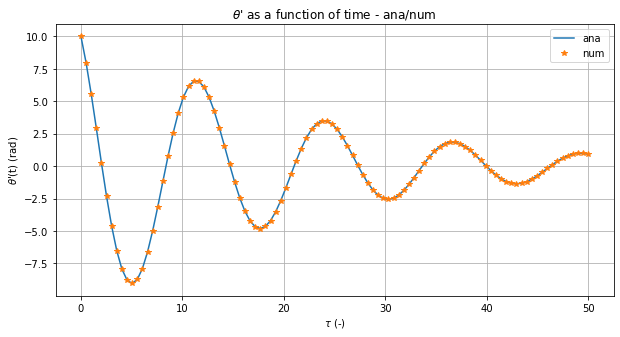

In [9]:
plt.figure(figsize=(10,5))

plt.plot(t, d_u_ana, '-', label='ana')
plt.plot(t, u_num[:,1], '*', label='num')

plt.title(r'$\theta$'+'\' as a function of time - ana/num')
plt.xlabel(r'$\tau$ (-)')
plt.ylabel(r'$\theta$'+'\'(t) (rad)')

plt.legend()
plt.grid(True)

### Phase portrait, trivial fixed point.

The above solutions of the linearized equation $\dot{\mathbf{\eta}}(t) = \mathbf{J_1}\mathbf{\eta}(t)$ about $\mathbf{x}^{\ast}=\mathbf{0}$ can be represented in the phase plane as well. We can also analytically compute the fixed point and represent it. What is the nature of this fixed point?

<img  src="Figures sujet/Phase_plane.png" width=700/>

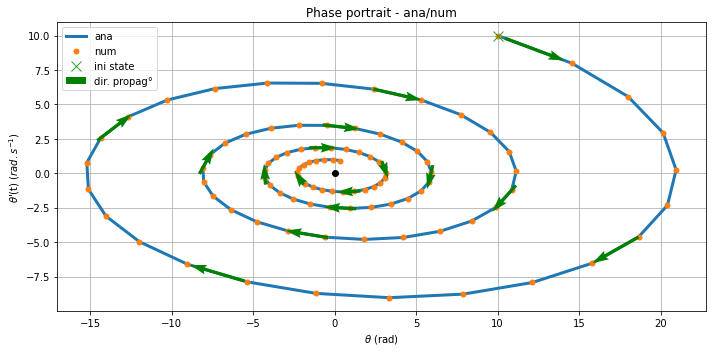

In [10]:
# Re-call data
Q, p, g, x, a, b, c = Data()

# Solve
t = np.linspace(0, 50, 100)

u_num  = odeint(sol_numeric, x, t)
u_ana, d_u_ana = sol_analytic(x, t)

# -----------------------------------
# get arrow for direction propagation
# -----------------------------------

pos_x = u_ana
pos_y = d_u_ana

u = np.diff(pos_x)[::6][:-1]
v = np.diff(pos_y)[::6][:-1]

pos_x = pos_x[::6][:-1] + u/2
pos_y = pos_y[::6][:-1] + v/2
norm = np.sqrt(u**2+v**2)

# ----
# Plot
# ----

plt.figure(figsize=(10,5))

plt.plot(u_ana, d_u_ana, '-', lw=3, label='ana')
plt.plot(u_num[:,0], u_num[:,1], '.', markersize=10, label='num')

# arrows
plt.quiver(pos_x, pos_y, u/norm**.5, v/norm**.5, angles="xy", width=.5*10**-2, zorder=5, pivot="mid", color='green', label='dir. propag°')

# initial value
plt.plot(x[0], x[1], 'x', markersize=10, label='ini state')

# final value
plt.plot(0, 0, 'ko')

# -----

plt.title('Phase portrait - ana/num')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$\theta$'+'\'(t)'+r' ($rad.s^{-1}$)')

plt.grid(True)
plt.legend()

plt.tight_layout()

### The sum of many trajectories starting at various $\mathbf{x}_0$ constitute the phase portrait

By starting from multiple initial conditions (here 4) and plotting the trajectories in the phase plane, we draw the phase portrait. We can check if the fixed point is the only one... But we could have guessed it because the system is linear...

<img  src="Figures sujet/Phase_portrait.png" width=700/>

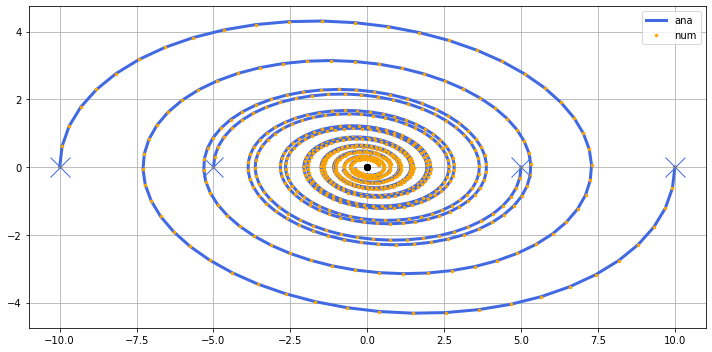

In [11]:
# loop over several initial conditions
x_vector = np.array([[+10, 0],
                     [+ 5, 0],
                     [- 5, 0],
                     [-10, 0]])

plt.figure(figsize=(10,5))

for x in x_vector:

    # -----
    # Solve
    # -----

    t = np.linspace(0, 50, 200)

    u_num  = odeint(sol_numeric, x, t)
    u_ana, d_u_ana = sol_analytic(x, t)

    # ----
    # Plot
    # ----

    curve1, = plt.plot(u_ana     , d_u_ana   , '-', color='royalblue', lw=3)
    curve2, = plt.plot(u_num[:,0], u_num[:,1], '.', color='orange', markersize=5)

    # initial value
    plt.plot(x[0], x[1], 'x', color='royalblue', markersize=20)

    # final value
    plt.plot(0, 0, 'ko')
    
plt.grid(True)
curve1.set_label('ana')
curve2.set_label('num')

plt.legend()
    
plt.tight_layout()

## Linear stability analysis of the trivial fixed point $\mathbf{x}_0=\mathbf{0}$ as $p$ varies. We plot the evolution of eigenvalues as a function of $p$

To check the nature of the stability of the trivial fixed point $(\theta^*,\phi^*)=(0,0)$ as $p$ is varied, we study the evolution of the eigenvalues of the Jacobian as a function of $p$. We can compute the eigenvalues analytically or numerically because the Jacobian is easy here. Here are the growth rate (real part of the eigenvalue), it tells if the eigenmodes diverge or not.

<img  src="Figures sujet/Growth_rate.png" width=700/>

In [12]:
Q, p, g, x, a, b, c = Data()

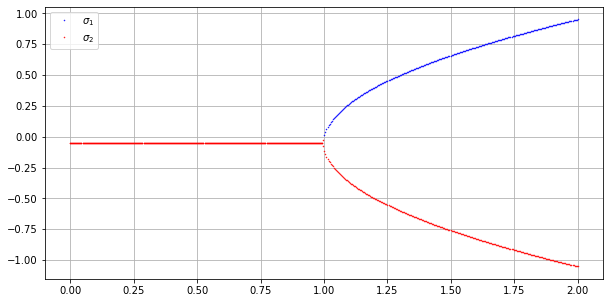

In [8]:
# loop over several p to have bifurcation diagram (when solution begins to explode)
p_vector = np.linspace(0, 2, 500)
x = np.array([0,0]) # intial point

# -----

plt.figure(figsize=(10,5))

eps = 1E-3
for p in p_vector:
    
    A = Jacobian_matrix(x, p, Q)
    
    lmbda, void = np.linalg.eig(A)
    
    for j in range(2):
        if np.real(lmbda[j]) > eps:
            curve1, = plt.plot(p, np.real(lmbda[j]), 'b.', markersize=1)
        else:
            curve2, = plt.plot(p, np.real(lmbda[j]), 'r.', markersize=1)
        
curve1.set_label(r'$\sigma_1$')
curve2.set_label(r'$\sigma_2$')

plt.legend()
plt.grid(True)

Here is the imaginary part of these eigenvalues (frequencies of the eigenmodes). They tell if the modes oscillate or not. 

<img  src="Figures sujet/Frequencies.png" width=700/>

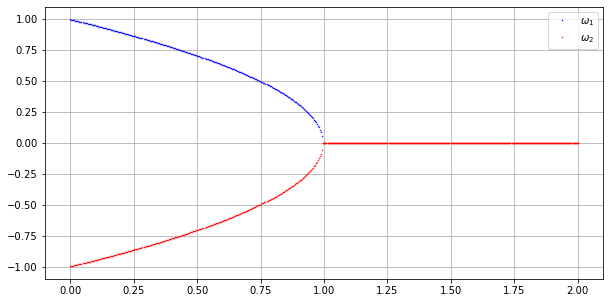

In [14]:
# loop over several p to have bifurcation diagram (when solution begins to explode)
p_vector = np.linspace(0, 2, 500)
x = np.array([0,0]) # intial point

# -----

plt.figure(figsize=(10,5))

eps = 1E-3
for p in p_vector:
    
    A = Jacobian_matrix(x, p, Q)
    
    eig_value, eig_vector = np.linalg.eig(A)
    
    for j in range(2):
        if np.imag(eig_value[j]) > eps:
            curve1, = plt.plot(p, np.imag(eig_value[j]), 'b.', markersize=1)
        else:
            curve2, = plt.plot(p, np.imag(eig_value[j]), 'r.', markersize=1)

curve1.set_label(r'$\omega_1$')
curve2.set_label(r'$\omega_2$')

plt.legend()
plt.grid(True)

What is the nature of the loss of instability? For what $p$ does it happen? Plot the phase portrait of the fixed point $(0,0)$ for $p=1.02$. Plot also the manifold lines that guide the unstable trajectories...

<img  src="Figures sujet/Phase_portrait_unstable.png" width=700/>

#### Phase portrait - $p>1$

In [15]:
def sol_analytic(x_0, t):
    
    """ Function returning analytical solution
    over time provided x_0 and t.
    """
    
    theta_0   = x_0[0]
    d_theta_0 = x_0[1]
    
    Xi = np.sqrt(+Delta(a, b, c)) / (2*a)
    
    A = theta_0
    B = (d_theta_0 + b/(2*a) * theta_0) / Xi
    
    theta   = np.exp(-b/(2*a) * t) * (A * np.cosh(Xi*t) + B * np.sinh(Xi*t))
    d_theta = (-b/(2*a)) * theta + np.exp(-b/(2*a) * t) * Xi * (A * np.sinh(Xi*t) + B * np.cosh(Xi*t))
    
    return theta, d_theta

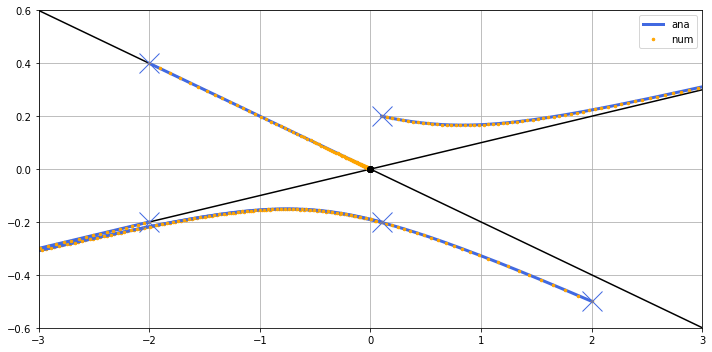

In [16]:
# loop over several initial conditions
x_vector = np.array([[2  , -.5],
                     [ .1, -.2],
                     [ .1, +.2],
                     [-2 , +.4],
                     [-2 , -.2]])

p = 1.02
a, b, c = 1, 1/Q, 1-p

A = Jacobian_matrix([0,0], p, Q)
eig_value, eig_vector = np.linalg.eig(A)

# -----

plt.figure(figsize=(10,5))

t = np.linspace(-100, 100, 10)
plt.plot(t*eig_vector[0,0], t*eig_vector[1,0], 'k-')
plt.plot(t*eig_vector[0,1], t*eig_vector[1,1], 'k-')

for x in x_vector:

    # -----
    # Solve
    # -----

    t = np.linspace(0, 50, 200)

    u_num  = odeint(sol_numeric, x, t)
    u_ana, d_u_ana = sol_analytic(x, t)

    # ----
    # Plot
    # ----

    curve1, = plt.plot(u_ana     , d_u_ana   , '-', color='royalblue', lw=3)
    curve2, = plt.plot(u_num[:,0], u_num[:,1], '.', color='orange', markersize=5)

    # initial value
    plt.plot(x[0], x[1], 'x', color='royalblue', markersize=20)

    # final value
    plt.plot(0, 0, 'ko')

plt.axis((-3, 3, -.6, +.6))

curve1.set_label('ana')
curve2.set_label('num')

plt.grid(True)
plt.legend()

plt.tight_layout()

[1] A. Lazarus, C. Maurini and S. Neukirch, Stability of discretized nonlinear elastic systems, in Extremely Deformable Structures, 1-53, Springer, 2015.